In [ ]:
# prediction of septic_shock patients admitted in ICU(Intensive critical care unit.)

Sepsis is a serious condition in which the body responds improperly to an infection. 
The infection-fighting processes turn on the body, causing the organs to work poorly. 
Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that 
can damage the lungs, kidneys, liver and other organs. When the damage is severe, 
it can lead to mortality.

Sepsis can progress to septic shock when certain changes in the circulatory system, 
the body's cells and how the body uses energy become more abnormal. 
Septic shock is more likely to cause death than sepsis is. 

Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by 
a dysregulated response to infection. In septic shock, there is critical reduction 
in tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, 
and liver, can occur.

In [ ]:
# lets read the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",200)

In [3]:
data=pd.read_csv("sepsis_status.csv")
dictionary=pd.read_csv("Parameter _detail_Dictionary.csv")

In [4]:
icu_df=data.copy()
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [6]:
icu_df["septic_shock"].value_counts()

0    83798
1     7915
Name: septic_shock, dtype: int64

In [7]:
icu_df["septic_shock"].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: septic_shock, dtype: float64

In [8]:
dictionary

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,Sepsis_status,None,binary,Whether the patient having sepsis during this ...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
...,...,...,...,...,...,...
183,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with no...,1
184,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with an...,1
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


In [9]:
def selectCategory(df,category):
    return df[df.Category==category]

In [10]:
cols=selectCategory(dictionary,"GOSSIS example prediction")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
187,GOSSIS example prediction,pred,None,numeric,"Example mortality prediction, shared as a 'bas...",0.000921


In [11]:
cols=selectCategory(dictionary,"APACHE grouping")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


In [12]:
#Preprocessing - first step finding missing value

In [13]:
icu_df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
septic_shock                      0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [14]:
pd.set_option("display.max_rows",200)

In [15]:
icu_df.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min                  84619
h1_bilirubin_max                  84619
h1_lactate_max                    84369
h1_lactate_min                    84369
h1_albumin_max                    83824
h1_albumin_min                    83824
h1_pao2fio2ratio_min              80195
h1_pao2fio2ratio_max              80195
h1_arterial_ph_max                76424
h1_arterial_ph_min                76424
h1_hco3_max                       76094
h1_hco3_min                       76094
h1_arterial_pco2_min              75959
h1_arterial_pco2_max              75959
h1_wbc_max                        75953
h1_wbc_min                        75953
h1_arterial_po2_max               75945
h1_arterial_po2_min               75945
h1_calcium_max                    75863
h1_calcium_min                    75863
h1_platelets_max                  75673
h1_platelets_min                  75673
h1_bun_max                        75091
h1_bun_min                        75091
h1_creatinine_max                 74957


In [16]:
high_null=icu_df.isnull().sum()/len(icu_df)

In [17]:
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [18]:
# we have mainly two categories of missing value -- more than 50% or less than 25%

In [19]:
# we can not impute the missing value

In [20]:
high_missing=high_null[high_null>0.50].index
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [21]:
len(high_missing)

74

In [22]:
# drop the columns having more than 50%  missing value

In [23]:
icu=icu_df.drop(high_missing,axis=1)

In [24]:
icu.shape

(91713, 112)

In [25]:
icu_df.shape

(91713, 186)

In [26]:
df1=icu.dropna()

In [27]:
df1.shape

(27795, 112)

In [28]:
df1.isnull().sum().sum()

0

In [29]:
df1.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71,0.71,156.0,125.0,27.0,27.0,15.6,15.6,44.2,44.2,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,22471,112115,118,0,46.0,25.845717,0,Hispanic,M,167.6,Emergency Department,Accident & Emergency,92,admit,CTICU,0.000000,0,72.6,108.0,203.01,0,0.0,15.0,1.00,1.0,4.0,0.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.0,36.6,36.6,15.0,15.0,8.5,8.5,1.00,1.00,143

In [30]:
# lets drop some columns which is having no significance as per our basic understanding

In [31]:
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]

In [32]:
df1=df1.drop(cols_to_drop,axis=1)
df1.shape

(27795, 106)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [34]:
object_columns=df1.select_dtypes(include="object").columns
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [35]:
df1_final=pd.get_dummies(df1,columns=object_columns,drop_first=True)

In [36]:
df1_final.head()

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,81,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,83,0,67.0,27.560000,0,190.5,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.7

In [37]:
df1_final.shape

(27795, 133)

In [38]:
# split the data in independent and dependent variables

In [39]:
X=df1_final.drop("septic_shock",axis=1)
Y=df1_final["septic_shock"]

In [40]:
Y.value_counts(normalize=True)

0    0.908761
1    0.091239
Name: septic_shock, dtype: float64

In [41]:
# we must check if any column has only one variable/no variance column

In [42]:
# finding the unique variable columns
one_unique=X.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [43]:
const_cols=one_unique[one_unique==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [44]:
X["readmission_status"].value_counts()

0    27795
Name: readmission_status, dtype: int64

In [45]:
X.drop(["readmission_status","gcs_unable_apache"],axis=1,inplace=True)

In [46]:
X.shape

(27795, 130)

In [47]:
X.isnull().sum().sum()

0

In [48]:
# lets find the multi collinearity between the columns

In [60]:
corr_matrix=X.corr(method="spearman").abs()
corr_matrix.shape

(130, 130)

<Axes: >

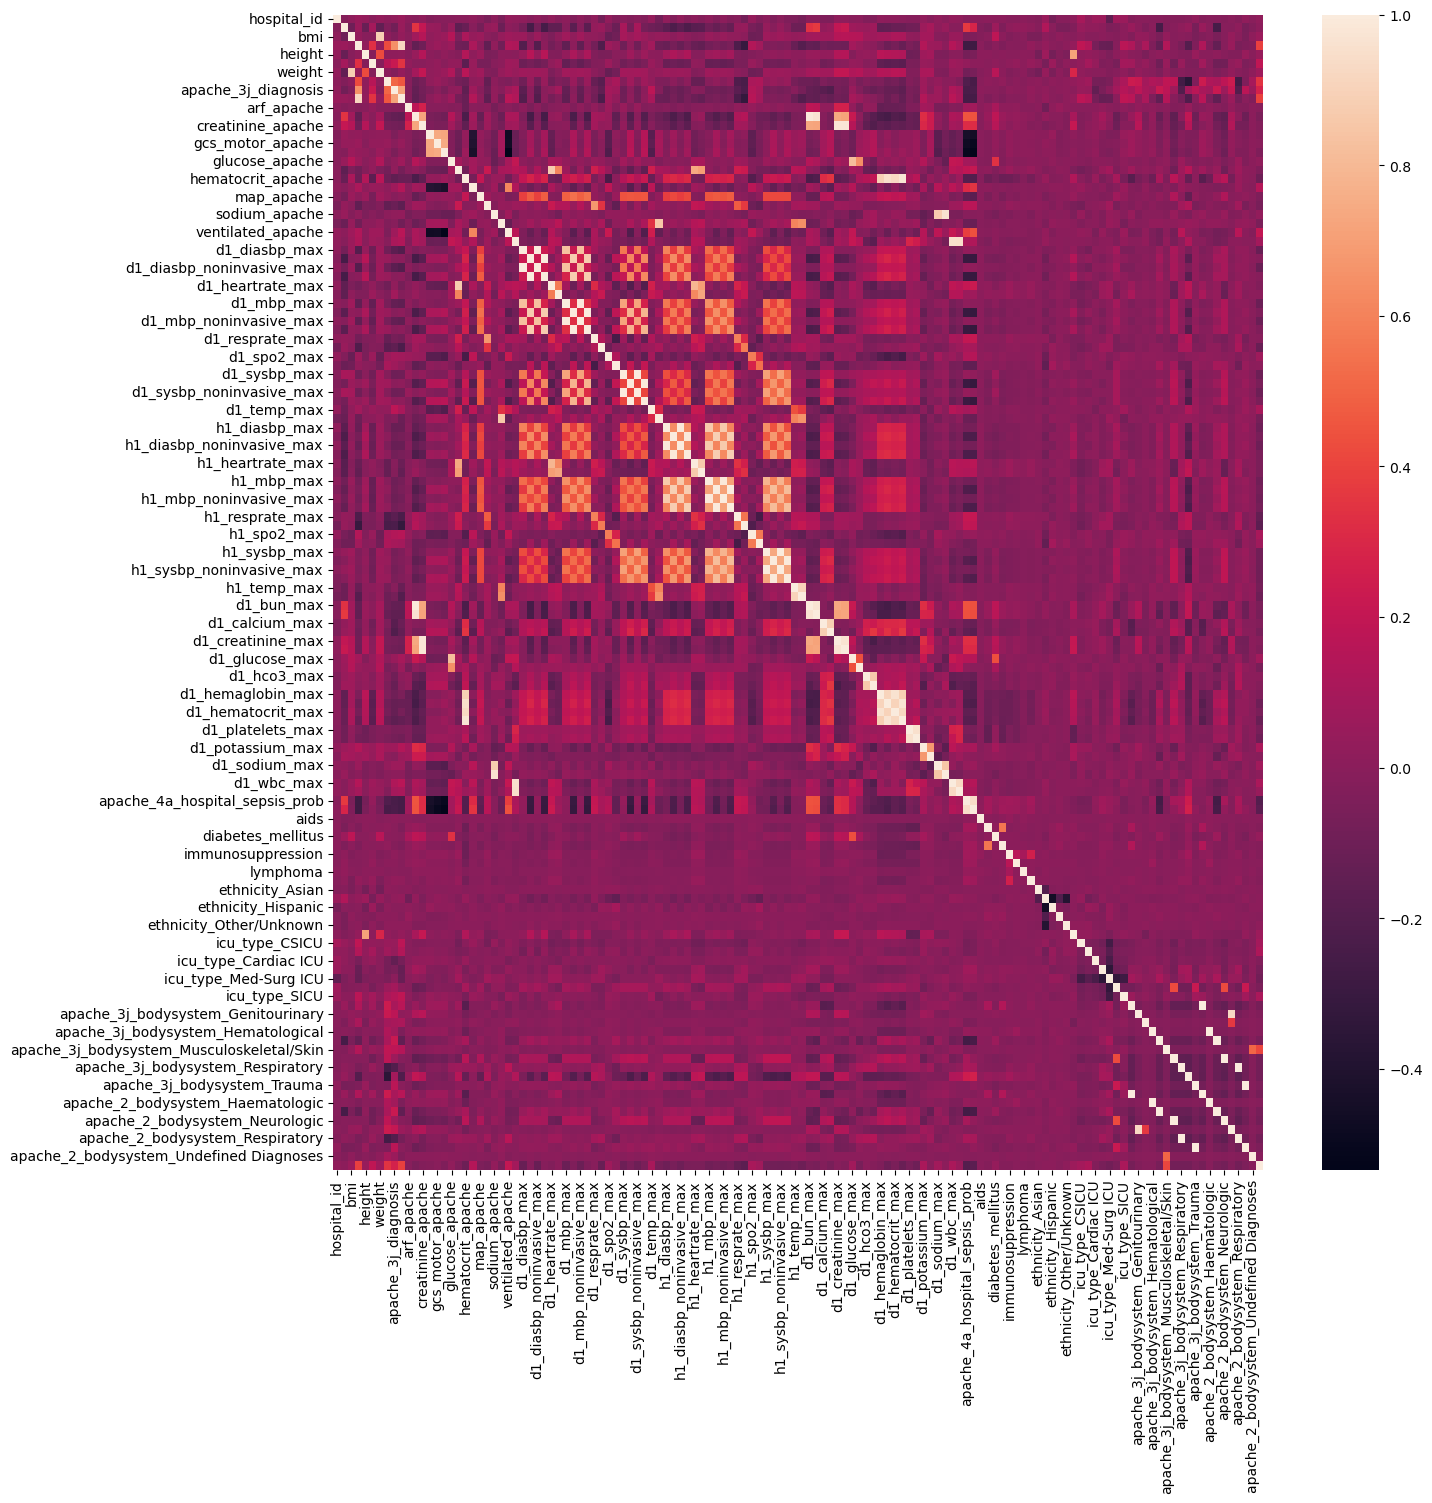

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)

In [51]:
# Assignment how to find the degree of corr between the columns--- how to find multi collinearity

In [58]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [68]:
#upper

In [ ]:
# bench mark 0.9

In [62]:
high_corr=[col for col in upper.columns if any(upper[col]>=0.9)]

In [63]:
high_corr

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [64]:
len(high_corr)

32

In [65]:
X1=X.drop(high_corr,axis=1)

In [66]:
X1.shape

(27795, 98)

In [67]:
X.shape

(27795, 130)

In [69]:
X1.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0.0,31.0,2.51,3.0,6.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,68.0,63.0,119.0,108.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,39.5,37.5,8.5,7.4,168.0,109.0,19.0,15.0,8.9,233.0,4.0,3.4,136.0,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,81,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0.0,9.0,0.56,1.0,3.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,61.0,48.0,114.0,100.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,36.3,36.3,8.6,8.0,145.0,128.0,27.0,26.0,11.3,557.0,4.2,3.8,145.0,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,83,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0.0,13.0,0.71,4.0,6.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,113.0,83.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,36.8,36.6,89.0,89.0,83.0,83.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,36.7,36.7,8.8,8.8,156.0,125.0,27.0,27.0,15.6,159.0,3.9,3.7,137.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17,118,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0.0,15.0,1.00,1.0,4.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,98.0,64.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,37.1,36.4,89.0,63.0,94.0,80.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,36.6,36.6,8.5,8.5,143.0,143.0,27.0,27.0,15.0,247.0,4.9,4.9,132.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,118,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0.0,13.0,0.94,3.0,6.0,1.0,105.0,99.0,28.9,0.0,133.0,33.0,146.0,36.3,1.0,9.9,88.0,65.0,116.0,74.0,123.0,90.0,36.0,16.0,100.0,90.0,179.0,129.0,36.8,35.6,71.0,65.0,116.0,92.0,102.0,90.0,36.0,28.0,99.0,90.0,159.0,129.0,36.8,36.3,7.7,7.7,144.0,87.0,26.0,26.0,9.7,273.0,3.4,3.3,146.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# confidence interval 

In [70]:
import scipy.stats as st

In [72]:
st.norm.interval(alpha=0.95,loc=np.mean(X1["age"]),scale=st.sem(X1["age"]))

(62.471691549087915, 62.85962703339094)

In [73]:
st.norm.interval(alpha=0.90,loc=np.mean(X1["age"]),scale=st.sem(X1["age"]))

(62.50287643058172, 62.828442151897136)

In [74]:
st.norm.interval(alpha=0.99,loc=np.mean(X1["age"]),scale=st.sem(X1["age"]))

(62.41074246719669, 62.92057611528217)

In [ ]:
# QQ plot is also use to check the normal distribution

In [75]:
from statsmodels.graphics.gofplots import qqplot

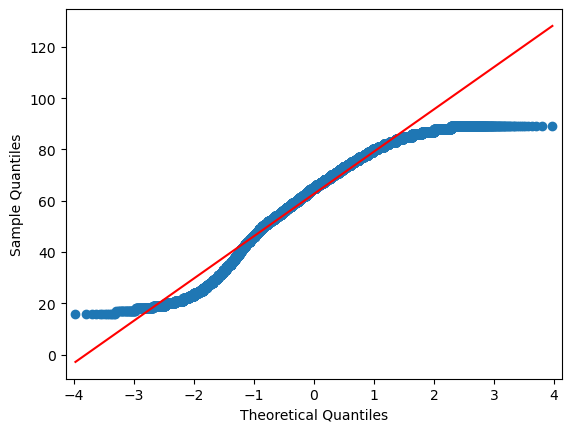

In [80]:
qqplot(X1["age"],line="s")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

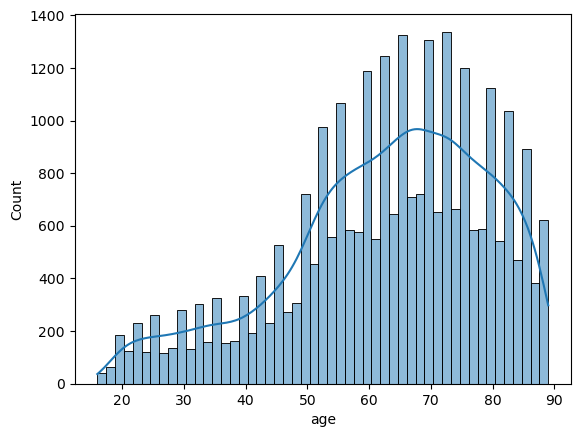

In [78]:
sns.histplot(x=X1["age"],kde=True)

In [81]:
st.shapiro(X1.age)

ShapiroResult(statistic=0.9591078758239746, pvalue=0.0)

In [ ]:
p is less than 0.05 we are able to reject null hypothesis .
H0:-age column is normally distributed
H1:-The age column is not normally distributed

In [ ]:
conclusion:-The age column is not normally distributed

In [ ]:
#select the best features for EDA or interpretation

In [82]:
from sklearn.feature_selection import SelectKBest

In [83]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

In [85]:
bestfeatures=SelectKBest(score_func=mutual_info_classif)
best_features=bestfeatures.fit(X1,Y)

In [86]:
best_features

SelectKBest(score_func=<function mutual_info_classif at 0x000001B58B3C20E0>)

In [87]:
dfscores=pd.DataFrame(best_features.scores_)
dfscores

,0
0,0.006393
1,0.005478
2,0.000000
3,0.006228
4,0.001434
5,0.006046
6,0.002605
7,0.034044
8,0.039337
9,0.002130


In [88]:
dfcolumns=pd.DataFrame(X1.columns)

In [90]:
#concating the two dataframe
features_score=pd.concat([dfcolumns,dfscores],axis=1)
features_score

,0,0
0,hospital_id,0.006393
1,age,0.005478
2,bmi,0.000000
3,elective_surgery,0.006228
4,height,0.001434
5,pre_icu_los_days,0.006046
6,weight,0.002605
7,apache_2_diagnosis,0.034044
8,apache_3j_diagnosis,0.039337
9,arf_apache,0.002130


In [91]:
features_score.columns=["Features","Score"]
features_score

,Features,Score
0,hospital_id,0.006393
1,age,0.005478
2,bmi,0.000000
3,elective_surgery,0.006228
4,height,0.001434
5,pre_icu_los_days,0.006046
6,weight,0.002605
7,apache_2_diagnosis,0.034044
8,apache_3j_diagnosis,0.039337
9,arf_apache,0.002130


In [93]:
best_features=features_score.nlargest(20,"Score")
best_features

,Features,Score
64,apache_4a_hospital_sepsis_prob,0.084350
8,apache_3j_diagnosis,0.039337
7,apache_2_diagnosis,0.034044
13,gcs_motor_apache,0.033722
12,gcs_eyes_apache,0.032173
14,gcs_verbal_apache,0.028740
23,ventilated_apache,0.028523
36,d1_sysbp_min,0.024351
30,d1_mbp_min,0.022048
22,temp_apache,0.021713


In [ ]:
# Dependence plot

In [95]:
from sklearn.inspection import PartialDependenceDisplay

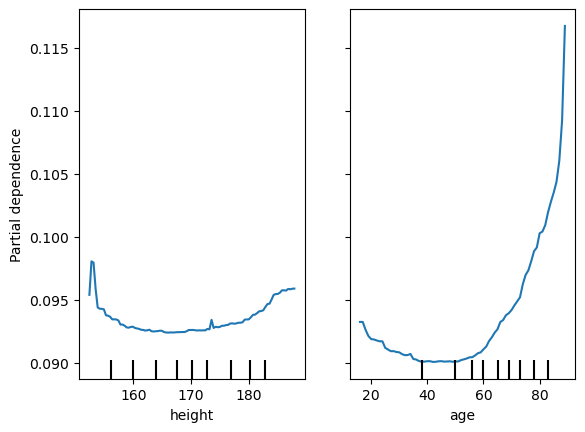

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(X1,Y)
disp1=PartialDependenceDisplay.from_estimator(model,X1,["height","age"])
plt.show()

In [ ]:
# scale the dataset

In [99]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X1)
X_scaled=pd.DataFrame(X_scaled,columns=X1.columns)
X_scaled.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.574257,0.712329,0.148859,0.0,0.738140,0.011390,0.239484,0.057971,0.190949,0.0,0.219512,0.203125,0.666667,1.0,0.75,0.230481,0.594595,0.318182,0.0,0.00000,0.571429,0.414634,0.947368,0.0,0.293987,0.184874,0.311688,0.512605,0.503497,0.233871,0.266667,0.256410,0.250,1.000000,0.74,0.288732,0.268908,1.000000,0.898494,0.292453,0.450549,0.618644,0.666667,0.318966,0.500000,0.326531,0.152542,1.000000,0.74,0.378378,0.439716,1.000000,0.718750,0.500000,0.395833,0.176580,0.298039,0.250000,0.25000,0.201923,0.369176,0.285714,0.294118,0.371429,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.391089,0.835616,0.237400,0.0,0.390478,0.017132,0.214383,0.033816,0.048571,0.0,0.040650,0.023897,0.000000,0.4,0.00,0.189387,0.608108,0.588068,0.0,0.03750,0.517857,0.682927,0.394737,1.0,0.262806,0.411765,0.233766,0.504202,0.503497,0.483871,0.177778,0.230769,0.300,1.000000,0.70,0.485915,0.218487,0.250000,0.543224,0.226415,0.285714,0.576271,0.592593,0.310345,0.235849,0.428571,0.237288,0.944444,0.70,0.135135,0.127660,0.475410,0.531250,0.521739,0.520833,0.133829,0.372549,0.535714,0.59375,0.432692,0.949821,0.333333,0.411765,0.628571,0.742424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.400990,0.698630,0.240043,0.0,0.912828,0.003346,0.416554,0.966184,0.143807,0.0,0.073171,0.037684,1.000000,1.0,1.00,0.209041,0.560811,0.795455,0.0,0.56250,0.553571,0.487805,0.592105,0.0,0.222717,0.453782,0.623377,0.462185,0.580420,0.540323,0.644444,0.230769,0.250,0.965517,0.91,0.584507,0.554622,0.354167,0.796989,0.490566,0.736264,0.313559,0.435185,0.534483,0.745283,0.040816,0.101695,0.966667,0.97,0.459459,0.638298,0.540984,0.593750,0.565217,0.687500,0.154275,0.360784,0.535714,0.62500,0.846154,0.236559,0.261905,0.382353,0.400000,0.530303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.574257,0.410959,0.207679,0.0,0.520637,0.003336,0.230665,0.033816,0.048571,0.0,0.089431,0.064338,0.000000,0.6,0.00,0.185814,0.567568,0.795455,1.0,0.45625,0.535714,0.365854,0.565789,1.0,0.195991,0.361345,0.623377,0.336134,0.447552,0.427419,0.600000,0.102564,0.225,1.000000,0

In [100]:
X_scaled.corrwith(Y)

hospital_id                                 -0.018689
age                                         -0.009518
bmi                                          0.006779
elective_surgery                            -0.011217
height                                      -0.011496
pre_icu_los_days                            -0.001166
weight                                       0.001936
apache_2_diagnosis                           0.000222
apache_3j_diagnosis                         -0.011126
arf_apache                                  -0.004057
bun_apache                                  -0.007310
creatinine_apache                           -0.011885
gcs_eyes_apache                             -0.009086
gcs_motor_apache                            -0.007279
gcs_verbal_apache                           -0.012828
glucose_apache                              -0.010924
heart_rate_apache                           -0.004311
hematocrit_apache                           -0.000382
intubated_apache            

In [101]:
# TRAIN TEST 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [104]:
model=rf.fit(X_train,Y_train)

In [105]:
Y_predict=model.predict(X_test)

In [106]:
accuracy_score(Y_test,Y_predict)

0.9221082928584278

In [107]:
confusion_matrix(Y_test,Y_predict)

array([[4997,   55],
       [ 378,  129]], dtype=int64)

In [108]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.70      0.25      0.37       507

    accuracy                           0.92      5559
   macro avg       0.82      0.62      0.67      5559
weighted avg       0.91      0.92      0.91      5559

